<a target="_blank" href="https://colab.research.google.com/github/sonder-art/fdd_p25/blob/main/professor/numpy/notebooks/tarea_tiempos_numpy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


### El proyecto se entrega en un pull-request en este documento directamente, que no sea del main branch sino de un branch llamado `proyecto_python`, y el titulo de pull reques `Proyecto Python`, se entrega antes del 6 de noviembre.

# Tarea/Proyecto — Tiempos con distintas estrategias (Python vs NumPy)

Objetivo: practicar varias formas de programar en Python y comparar su rendimiento con NumPy.

Qué harás:
- Implementar 3 problemas (P1 sencillo, P2 intermedio, P3 un poco más complejo).
- Para cada problema, crear 4 versiones: for, list comprehension, generator (yield/generador), y NumPy vectorizado.
- Medir tiempos con `timeit` de forma justa y compararlos.

Reglas mínimas:
- Verifica primero que todas las versiones producen el mismo resultado lógico (mismo tamaño/forma, mismos valores o valores equivalentes).
- Sé consistente: no mezcles listas y arreglos sin aclarar el formato final esperado.
- Para medir generadores, materializa con `list(...)` en el cronómetro para compararlo con las otras estrategias.
- No copies soluciones externas; escribe tu implementación.

Referencia: `07_Vectorizacion_vs_For_vs_Comprehensions.ipynb`.



In [1]:
# Instalación rápida (si la necesitas)

import numpy as np
import timeit


## Problema 1 — Escalar un vector por una constante

Descripción: dado un arreglo 1D `a` y una constante escalar `c`, produce una salida equivalente a `a * c`.

Requisitos:
- Entrada: `a` (1D), `c` (float/int).
- Salida: misma longitud que `a`, valores escalados por `c`.
- Mantén el tipo de salida consistente entre versiones (lista vs ndarray), o documenta la diferencia.

Implementa 4 versiones:
- for loop (acumula resultados con append)
- list comprehension
- generator (yield o expresión generadora)
- NumPy vectorizado

Datos sugeridos: `a = np.arange(n, dtype=float)`, `c = 2.0`.


In [4]:
# P1 — Stubs (completa las funciones)
def p1_for(a: np.ndarray, c: float):
    """Devuelve a*c usando for y append."""
    res= []
    for x in a: 
        res.append(x*c)
    return res 


def p1_comp(a: np.ndarray, c: float):
    """Devuelve a*c usando list comprehension."""
    return [x*c for x in a]


def p1_gen(a: np.ndarray, c: float):
    """Devuelve (como generador) a*c usando yield o gen expr."""
    for x in a:
        yield x*c

def p1_np(a: np.ndarray, c: float):
    """Devuelve a*c usando NumPy vectorizado."""
    return a* c


In [14]:

def time_p1(n=1_000_000, number=5):
    a = np.arange(n, dtype=float)
    c = 2.0
    return (
        timeit.timeit(lambda: p1_for(a, c), number=number),
        timeit.timeit(lambda: p1_comp(a, c), number=number),
        timeit.timeit(lambda: list(p1_gen(a, c)), number=number),
        timeit.timeit(lambda: p1_np(a, c), number=number),
    )

t_for, t_comp, t_gen, t_np = time_p1()

print(f"For loop          : {t_for} s")
print(f"List comprehension: {t_comp} s")
print(f"Generator : {t_gen} s")
print(f"NumPy vectorizado : {t_np} s")




For loop          : 0.5134079999988899 s
List comprehension: 0.470787082973402 s
Generator : 0.5460512500139885 s
NumPy vectorizado : 0.004348916991148144 s


## Problema 2 — Suma de vecinos 1D (ventana)

Descripción: dado `a` (1D) y una ventana `k` impar (p. ej. 3), calcular `b[i]` como la suma de los `k` vecinos centrados en `i`.

Requisitos:
- Entrada: `a` (1D), `k` impar ≥ 3.
- Borde: puedes ignorar índices fuera de rango, recortar el resultado o replicar/extender bordes; explica tu elección.
- Salida: 1D; documenta si su longitud cambia por tu manejo de bordes.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (pistas: slicing con desplazamientos, `np.roll`, o una convolución simple).

Datos sugeridos: `a = np.arange(n, dtype=float)`, `k = 3`. 


In [15]:
# P2 — Stubs (completa las funciones)

def p2_for(a: np.ndarray, k: int = 3):
    """Devuelve suma de vecinos (1D) con for. Manejo de bordes a tu elección."""
    n = len(a)
    r = []
    h = k // 2
    for i in range(n):
        s = 0.0
        for off in range(-h, h + 1):
            j = i + off
            if 0 <= j < n:  
                s += a[j]
        r.append(s)
    return r


def p2_comp(a: np.ndarray, k: int = 3):
    """List comprehension."""
    n = len(a)
    h = k // 2
    return [
        sum(a[j] for j in range(i - h, i + h + 1) if 0 <= j < n)
        for i in range(n)
    ]


def p2_gen(a: np.ndarray, k: int = 3):
    """Generator (yield o gen expr)."""
    n = len(a)
    h = k // 2
    for i in range(n):
        yield sum(a[j] for j in range(i - h, i + h + 1) if 0 <= j < n)


def p2_np(a: np.ndarray, k: int = 3):
    """NumPy vectorizado (slicing/roll/convolución simple)."""
    kernel = np.ones(k, dtype=float)
    return np.convolve(a, kernel, mode='same')


In [20]:
# P2 — Harness de tiempos

def time_p2(n=100_000, number=3,k=3):
    a = np.arange(n, dtype=float)
    return (
        timeit.timeit(lambda: p2_for(a, k), number=number),
        timeit.timeit(lambda: p2_comp(a, k), number=number),
        timeit.timeit(lambda: list(p2_gen(a, k)), number=number),
        timeit.timeit(lambda: p2_np(a, k), number=number),
    )
t_for, t_comp, t_gen, t_np = time_p2(n=1_000_000, number=3, k=3)

print(f"For loop          : {t_for} s")
print(f"List comprehension: {t_comp} s")
print(f"Generator : {t_gen} s")
print(f"NumPy: {t_np} s")


For loop          : 1.7726424160064198 s
List comprehension: 2.418547209003009 s
Generator : 2.4733926670160145 s
NumPy: 0.0035077090142294765 s


## Problema 3 — Transformación no lineal y filtrado

Descripción: dado `a` (1D float), aplica una transformación no lineal y filtra con un umbral.

Requisitos:
- Transformación propuesta (de ejemplo): `np.sin(a) + a**2`.
- Entrada: `a` (1D float), `umbral` (float).
- Salida: colección con los elementos resultantes que superan `umbral`.
- Mantén clara la diferencia entre devolver lista vs ndarray.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (ufuncs + máscara booleana).

Datos sugeridos: `a = np.linspace(0, 1000, n)`, `umbral = 10.0`. 


In [22]:
# P3 — Stubs (completa las funciones)

def p3_for(a: np.ndarray, umbral: float):
    """Filtra tras transformación no lineal con for."""
    res = []
    for x in a:
        y = np.sin(x) + x**2
        if y > umbral:
            res.append(y)
    return res


def p3_comp(a: np.ndarray, umbral: float):
    """List comprehension."""
    return [np.sin(x) + x**2 for x in a if np.sin(x) + x**2 > umbral]


def p3_gen(a: np.ndarray, umbral: float):
    """Generator (yield o gen expr)."""
    return (np.sin(x) + x**2 for x in a if np.sin(x) + x**2 > umbral)


def p3_np(a: np.ndarray, umbral: float):
    """NumPy vectorizado (ufuncs + máscara booleana)."""
    y = np.sin(a) + a**2
    return y[y > umbral]


In [76]:
# P3 — Harness de tiempos

def time_p3(n=200_000, number=3):
    a = np.linspace(0, 1000, n, dtype=float)
    umbral = 10.0
    return (
        timeit.timeit(lambda: p3_for(a, umbral), number=number),
        timeit.timeit(lambda: p3_comp(a, umbral), number=number),
        timeit.timeit(lambda: list(p3_gen(a, umbral)), number=number),
        timeit.timeit(lambda: p3_np(a, umbral), number=number),
    )

t_for, t_comp, t_gen, t_np = time_p3(n=200_000, number=3)

print(f"For loop          : {t_for} s")
print(f"List comprehension: {t_comp} s")
print(f"Generator  : {t_gen} s")
print(f"NumPy vectorizado: {t_np} s")


For loop          : 0.44939341698773205 s
List comprehension: 0.9776300410158001 s
Generator  : 0.877124416991137 s
NumPy vectorizado: 0.004632125026546419 s


## Guardar resultados de tiempos en JSON (guía)

Motivación: conservar resultados de experimentos para compararlos más tarde (en otra sesión/equipo), graficarlos o compartirlos. JSON es legible, portable y fácil de procesar.

### Esquema sugerido de datos

- Nivel 1: metadatos del experimento (fecha/hora, versión de Python/NumPy, host, parámetros globales como `n` y `number`).
- Nivel 2: problemas y variantes (p1/p2/p3 y estrategias: for/comp/gen/numpy) con sus tiempos agregados.
- Recomendación: guardar mediana y desviación o percentiles; también puedes guardar el vector de repeticiones si lo necesitas.

```json
{
  "metadata": {
    "timestamp": "2025-10-23T12:34:56Z",
    "python_version": "3.10.12",
    "numpy_version": "2.1.1",
    "machine": "x86_64",
    "params": { "n": 100000, "number": 5 }
  },
  "results": {
    "p1": {
      "for":    { "s_per_call_median": 0.0281, "repetitions": 5 },
      "comp":   { "s_per_call_median": 0.0250, "repetitions": 5 },
      "gen":    { "s_per_call_median": 0.0312, "repetitions": 5 },
      "numpy":  { "s_per_call_median": 0.0004, "repetitions": 5 }
    },
    "p2": { "for": { "s_per_call_median": 0.041 } },
    "p3": { "numpy": { "s_per_call_median": 0.003 } }
  }
}
```

Notas:
- Usa claves en minúsculas y sin espacios para facilitar procesamiento.
- Si guardas vectores de tiempos por repetición, usa una clave adicional (por ejemplo `raw_times: [ ... ]`).
- Si diferencias por tamaño `n`, crea múltiples entradas o anida por `n` (p. ej. `results_by_n: {"1e4": {...}, "1e5": {...}}`).

### Organización de archivos

- Carpeta: `results/tiempos/` dentro del mismo directorio del notebook.
- Nombre de archivo: incluir fecha, problema o tamaño (p. ej., `tiempos_p123_n1e5_2025-10-23.json`).
- Evita sobreescribir: si vuelves a correr, genera un nuevo archivo con timestamp.

### Buenas prácticas al medir y guardar

- Medir varias repeticiones por variante; guardar la mediana (y opcionalmente percentiles como p10/p90) para robustez.
- Registrar parámetros que afectan el resultado: `n`, `number`, dtype, política de bordes en P2, etc.
- Guardar seeds o condiciones de entorno si hay aleatoriedad.
- Validar que los resultados lógicos son equivalentes antes de medir (mismo output).
- No mezclar E/S dentro de la sección medida; la E/S sesga los tiempos.

### Uso posterior

- Leer los JSON y comparar versiones/estrategias; graficar con `matplotlib`/`seaborn`.
- Automatizar reportes que lean todos los archivos de `results/tiempos/` y generen tablas comparativas.
- Mantener un historial temporal para ver regresiones o mejoras de rendimiento.



In [62]:
import os, json, timeit, platform, datetime, sys
from statistics import median

#Ppara calcular la mediana de los tiempos
def _median_and_raw(callable_factory, repetitions=5):
    raw = [ timeit.timeit(callable_factory(), number=1) for _ in range(repetitions) ]
    return {"s_per_call_median": float(median(raw)), "repetitions": repetitions, "raw_times": raw}

#para crear el bloque de metadata 
def _meta(params):
    return {
        "timestamp": datetime.datetime.utcnow().strftime("%Y-%m-%dT%H:%M:%SZ"),
        "python_version": sys.version.split()[0],
        "numpy_version": np.__version__,
        "machine": platform.machine(),
        "params": params,
    }

def p1(n=1_000_000, repetitions=5, c=2.0):
    a = np.arange(n, dtype=float)
    resultados ={
        "for":   _median_and_raw(lambda: (lambda: p1_for(a, c)),  repetitions),
        "comp":  _median_and_raw(lambda: (lambda: p1_comp(a, c)), repetitions),
        "gen":   _median_and_raw(lambda: (lambda: list(p1_gen(a, c))), repetitions),
        "numpy": _median_and_raw(lambda: (lambda: p1_np(a, c)),   repetitions),
    }
    for v in resultados.values():
        v["n"] = n
    return resultados


def p2(n=100_000, repetitions=5, k=3):
    a = np.arange(n, dtype=float)
    resultados = {
        "for":   _median_and_raw(lambda: (lambda: p2_for(a, k)),  repetitions),
        "comp":  _median_and_raw(lambda: (lambda: p2_comp(a, k)), repetitions),
        "gen":   _median_and_raw(lambda: (lambda: list(p2_gen(a, k))), repetitions),
        "numpy": _median_and_raw(lambda: (lambda: p2_np(a, k)),   repetitions),
    }
    for v in resultados.values():
        v["n"] = n
    return resultados



def p3(n=200_000, repetitions=5, umbral=10.0):
    a = np.linspace(0, 1000, n, dtype=float)
    resultados= {
        "for":   _median_and_raw(lambda: (lambda: p3_for(a, umbral)),  repetitions),
        "comp":  _median_and_raw(lambda: (lambda: p3_comp(a, umbral)), repetitions),
        "gen":   _median_and_raw(lambda: (lambda: list(p3_gen(a, umbral))), repetitions),
        "numpy": _median_and_raw(lambda: (lambda: p3_np(a, umbral)),   repetitions),
    }
    for v in resultados.values():
        v["n"] = n
    return resultados

# JSON 
def correr_y_guardar():
    params = {"n_p1": 1_000_000, "n_p2": 100_000, "n_p3": 200_000, "repetitions": 5, "k": 3, "umbral": 10.0}
    data = {
        "metadata": _meta(params),
        "results": {
            "p1": p1(n=params["n_p1"], repetitions=params["repetitions"], c=2.0),
            "p2": p2(n=params["n_p2"], repetitions=params["repetitions"], k=params["k"]),
            "p3": p3(n=params["n_p3"], repetitions=params["repetitions"], umbral=params["umbral"]),
        }
    }
    # creamos la carpeta results/tiempos si no existe 
    os.makedirs("results/tiempos", exist_ok=True)
    #  guarda el archivo 
    fname = f"results/tiempos/tiempos_p123_{datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S')}.json"

    #para saber que el JSON se creo bien 
    with open(fname, "w") as f:
        json.dump(data, f, indent=2)
    print(f"JSON  en {fname}")

    return fname, data

fname, data = correr_y_guardar()

#nos enseña un poco del JSON
import json
print(json.dumps(data, indent=2))


/var/folders/66/z9x_pr6131b_j1cvn7v32gvh0000gn/T/ipykernel_83522/2399024989.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.datetime.utcnow().strftime("%Y-%m-%dT%H:%M:%SZ"),


JSON  en results/tiempos/tiempos_p123_2025-11-09_144011.json
{
  "metadata": {
    "timestamp": "2025-11-09T20:40:05Z",
    "python_version": "3.12.7",
    "numpy_version": "2.3.4",
    "machine": "arm64",
    "params": {
      "n_p1": 1000000,
      "n_p2": 100000,
      "n_p3": 200000,
      "repetitions": 5,
      "k": 3,
      "umbral": 10.0
    }
  },
  "results": {
    "p1": {
      "for": {
        "s_per_call_median": 0.09815183299360797,
        "repetitions": 5,
        "raw_times": [
          0.10152691695839167,
          0.09754162497119978,
          0.09843541705049574,
          0.09720991703215986,
          0.09815183299360797
        ],
        "n": 1000000
      },
      "comp": {
        "s_per_call_median": 0.09238024998921901,
        "repetitions": 5,
        "raw_times": [
          0.09246112499386072,
          0.09827420796500519,
          0.09230829100124538,
          0.09209195798030123,
          0.09238024998921901
        ],
        "n": 1000000
    

## Guía de medición y reporte

- Usa `timeit.timeit` con el mismo `number` de repeticiones para todas las versiones.
- Antes de medir, ejecuta cada función una vez (warm‑up) si tu entorno lo requiere.
- Reporta tiempos en una tabla simple o tupla por problema: `(for, comp, gen, numpy)`.
- Interpreta resultados: ¿qué versión gana?, ¿por cuánto?, ¿cambia con `n`?
- Evita medir al mismo tiempo código que imprime o muestra gráficos.

Sugerencia: prueba varios tamaños `n` (por ejemplo: 10^4, 10^5, 10^6) y observa tendencias.


Aquí tienes una versión mejorada —más clara, profesional y fluida— de tu descripción, manteniendo todo el contenido técnico pero con mejor redacción, estructura y tono didáctico:

---

## Guía de visualización con Seaborn y Matplotlib 

**Objetivo:**
Utilizar los tiempos almacenados en formato JSON para **visualizar y analizar el rendimiento de distintas estrategias**, aprendiendo por tu cuenta a usar **Seaborn** y **Matplotlib**.
Esta guía explica **qué graficar**, **cómo interpretar los resultados** y **qué investigar** en la documentación oficial. *(No se proporciona código.)*

---

### 1️⃣ Preparación conceptual de los datos (formato “largo” o *tidy data*)

Antes de graficar, imagina tu tabla en formato largo, ideal para Seaborn.
Cada fila debe representar una observación o una agregación (por ejemplo, la mediana por problema, estrategia y tamaño `n`).

**Columnas sugeridas:**
`problema` (p1/p2/p3), `estrategia` (for/comp/gen/numpy), `n`, `repeticion`,
`s_por_llamada` (o `ns_por_elemento`), `mediana`, `p25`, `p75`, `host`, `python_version`, `numpy_version`.

**Investiga:** cómo transformar datos a formato largo en Seaborn, y cómo asignar columnas a ejes, color (`hue`), y paneles (`facet`).

---

### 2️⃣ Gráfico de barras agrupadas (comparación por problema)

**Qué mostrar:**
Barras agrupadas por `estrategia` dentro de cada `problema`, donde la altura sea la mediana de `s_por_llamada`.
Añade **barras de error** (p25–p75 o intervalos de confianza) para reflejar la variabilidad.

**Interpretación esperada:**
Identifica la estrategia más rápida en cada problema y comenta las diferencias relativas
(p. ej. *“NumPy es aproximadamente 60× más rápido que el bucle for en P1”*).

**Variaciones:**
Si tienes varios tamaños `n`, crea paneles por `n` o por `problema`.

---

### 3️⃣ Boxplots o Violinplots (variabilidad y outliers)

**Qué mostrar:**
Para un `problema` y `n` fijos, representa la distribución de `s_por_llamada` por `estrategia` mediante boxplots o violinplots.

**Interpretación:**
Compara la dispersión entre estrategias, detecta outliers y analiza cuál es más estable o consistente.
**Sugerencia:** agrega los puntos individuales de las repeticiones (usa *swarmplot* o *stripplot* superpuestos).

---

### 4️⃣ Curvas de escalamiento (tiempo vs tamaño `n`)

**Qué mostrar:**
Gráfico de líneas con `x = n`, `y = s_por_llamada` (o `ns_por_elemento`), y una línea por `estrategia`.
Usa escala log–log si hay grandes diferencias de magnitud.

**Interpretación:**
Compara las pendientes para ver cómo crece el tiempo con `n`.
Detecta cruces donde una estrategia empieza a superar a otra según el tamaño.

**Sugerencia:**
Usa *facets* por `problema` para comparar patrones entre P1, P2 y P3.

---

### 5️⃣ Eficiencia por elemento (`ns_por_elemento`)

**Qué mostrar:**
Gráfico de dispersión o líneas de `ns_por_elemento` frente a `n`, diferenciando por `estrategia`.

**Interpretación:**
Busca trayectorias planas (eficiencia estable).
Comenta desviaciones que puedan indicar efectos de caché, memoria o *overhead*.

---

### 6️⃣ Heatmap de razones (comparación con NumPy)

**Qué mostrar:**
Matriz donde cada celda es la razón `tiempo_estrategia / tiempo_numpy`, organizada por `problema` y `n`.

**Interpretación:**
Colorea las celdas: >1 significa más lento que NumPy; <1, más rápido.
Permite ver de un vistazo cuánto más lenta es cada alternativa y si esa relación cambia con `n`.

---

### 7️⃣ ECDF o histogramas (robustez de medición)

**Qué mostrar:**
Para un `problema` y `n` determinados, traza la **ECDF** o un **histograma** de `s_por_llamada` por `estrategia`.

**Interpretación:**
Compara la probabilidad de obtener tiempos inferiores a un umbral.
Analiza el solapamiento entre estrategias y comenta su robustez.

---

### 8️⃣ Diseño y buenas prácticas de visualización

* **Ejes y unidades:** etiqueta claramente (segundos por llamada, nanosegundos por elemento). Usa escalas logarítmicas si hay diferencias grandes.
* **Títulos y leyendas:** incluye el `problema`, `n`, entorno y fecha si es relevante. Mantén leyendas claras.
* **Paletas:** usa siempre los mismos colores por `estrategia` (orden: for → comp → gen → numpy).
* **Barras de error:** representa p25–p75 o intervalos por *bootstrap*.
* **Anotaciones:** agrega etiquetas informativas (p. ej. “×60 más rápido”).
* **Exportación:** guarda en PNG o SVG con resolución suficiente (DPI alto).

---

### 9️⃣ Interpretación (qué incluir en el reporte)

Para cada figura, redacta **4–6 frases** que respondan:

* ¿Qué estrategia es más rápida y por cuánto? ¿Cambia con `n`?
* ¿Cuál muestra menor dispersión? ¿Existen *outliers*?
* ¿Qué patrones de escalamiento aparecen? ¿Se observan efectos de memoria o caché?
* ¿Qué recomendación práctica harías según el problema?

---

### 🔟 Pistas de investigación (sin código)

Explora en la documentación de Seaborn/Matplotlib cómo:

* Crear gráficos de barras con barras de error.
* Generar boxplots o violinplots con puntos superpuestos.
* Dibujar líneas múltiples (una por `estrategia`) y facetas por `problema`.
* Aplicar escalas logarítmicas y personalizar ejes, leyendas y estilos.
* Construir heatmaps con normalización de colores para ratios.

---

### ✅ Entregables mínimos

1. **Gráfico de barras agrupadas** por `problema` (con barras de error) y su interpretación.
2. **Boxplot o violinplot** por `problema` y `n` (uno representativo) con interpretación.
3. **Curva de escalamiento** (`y` vs `n`) con facetas por `problema` e interpretación.
4. **Heatmap de razones** respecto a NumPy e interpretación.

---

**Recordatorio:**
El objetivo no es reproducir un estilo exacto, sino **demostrar criterio al elegir la visualización adecuada**, **etiquetar correctamente** e **interpretar con rigor** los resultados.

---



In [71]:
import json, glob, pandas as pd

#para leer el JSON más reciente
files = glob.glob("results/tiempos/tiempos_p123_*.json")
latest = max(files, key=os.path.getmtime)
with open(latest) as f:
    data = json.load(f)

#cambiar 
n_grid = {
    "p1": [10_000, 100_000, 1_000_000],
    "p2": [20_000, 100_000, 200_000],
    "p3": [50_000, 100_000, 200_000],
}

def medir(n_grid, repetitions=3):
    rows = []
    for problema, ns in n_grid.items():
        for n in ns:
            if problema == "p1":
                res = p1(n=n, repetitions=repetitions, c=2.0)
            elif problema == "p2":
                res = p2(n=n, repetitions=repetitions, k=3)
            else:  
                res = p3(n=n, repetitions=repetitions, umbral=10.0)

            for estrategia, valores in res.items():
                rows.append({
                    "problema": problema,
                    "estrategia": estrategia,
                    "n": n,
                    "s_por_llamada": valores["s_per_call_median"],
                })
    import pandas as pd
    return pd.DataFrame(rows)

df_curve = medir(n_grid, repetitions=3)  
df_curve.head()

,problema,estrategia,n,s_por_llamada
0,p1,for,10000,0.001470
1,p1,comp,10000,0.001521
2,p1,gen,10000,0.001159
3,p1,numpy,10000,0.000009
4,p1,for,100000,0.009215


In [ ]:
!pip install seaborn

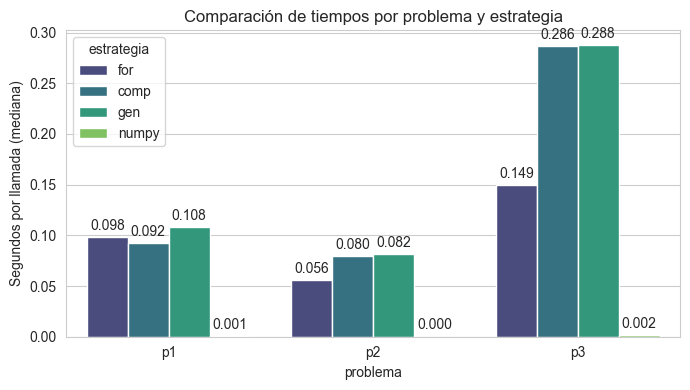

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

#GRAFICA 1: Grafica de barras agrupadas  
orden = ["for", "comp", "gen", "numpy"]
palette = sns.color_palette("viridis", n_colors=4)

plt.figure(figsize=(7,4))
ax = sns.barplot(
    data=df,
    x="problema", y="s_por_llamada",
    hue="estrategia",
    hue_order=orden,
    palette=palette,
    errorbar="sd"         
)

plt.title("Comparación de tiempos por problema y estrategia")
plt.ylabel("Segundos por llamada (mediana)")
plt.xlabel("problema")

# Etiquetas en las barras (una por contenedor)
for cont in ax.containers:
    ax.bar_label(cont, fmt="%.3f", padding=3)

plt.legend(title="estrategia")
plt.tight_layout()
plt.show()


#plt.savefig("resultados/barras_p123.png", dpi=300, bbox_inches="tight")


**Interpretación primera gráfica (de barras):**

Esta gráfica muestra la mediana de los tiempo por cada estrategia y problema.

- La estrategia más rápida en los tres problemas es NumPy, mientras que las demás estrategias son entre 40 y 150 veces más lentas dependiendo del problema.

- Los patrones de escalamiento muestran que los tiempos de las estrategias for, comp y gen crecen conforme aumenta la complejidad del problema (por ejemplo en el p3 los tiempos son mayores), mientras que NumPy mantiene tiempos casi constantes. Esto podría ser por una mejor gestión de memoria y caché. 

- Diría que para cálculos numéricos grandes, es mejor NumPy vectorizado, ya que tiene buena velocidad, estabilidad y aprovecha los recursos del sistema 

/var/folders/66/z9x_pr6131b_j1cvn7v32gvh0000gn/T/ipykernel_83522/2789323505.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/66/z9x_pr6131b_j1cvn7v32gvh0000gn/T/ipykernel_83522/2789323505.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


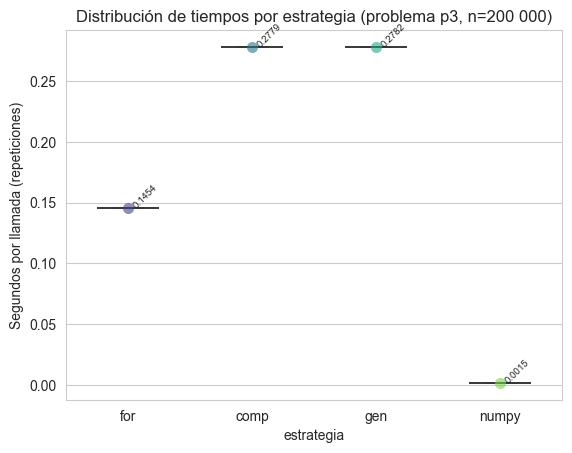

In [140]:
#GRÁFICA 2: BOXPLOT 
p = "p3"
n_ref = 200_000
df_fijo = df_curve[(df_curve["problema"] == p) & (df_curve["n"] == n_ref)]

orden = ["for", "comp", "gen", "numpy"]
paleta = sns.color_palette("viridis", n_colors=4)

ax = sns.boxplot(
    data=df_fijo, x="estrategia", y="s_por_llamada",
    order=orden, palette=paleta, width=0.5, fliersize=4, linewidth=1.2
)

sns.stripplot(
    data=df_fijo, x="estrategia", y="s_por_llamada",
    palette=paleta,order=orden, size=8, alpha=0.6, jitter=True
)

for _, row in df_fijo.iterrows():
    x = orden.index(row["estrategia"])
    y = row["s_por_llamada"]
    ax.text(x+0.03, y, f"{y:.4f}", fontsize=7, rotation=45)

plt.title("Distribución de tiempos por estrategia (problema p3, n=200 000)")
plt.ylabel("Segundos por llamada (repeticiones)")


plt.show()
#plt.savefig("resultados/violin_p3.png", dpi=300, bbox_inches="tight")



**Interpretación segunda gráfica (boxplot)**: 
- La estrategia más rápida es NumPy, con tiempos alrededor de 0.002 s por llamada, mientras que las basadas en bucles (for, comp y gen) están entre 70 y 140 veces más lentas.
- La dispersión de los datos es muy baja en todas las estrategias, por eso se ve que las cajas esán "planas". La diferencia entre estrategias muestra que las basadas en bucles van a ser ineficientes en memoria y caché, especialmente con volúmenes grandes de datos.
- En la práctica recomendarás usar NumPy para operaciones vectorizadas grandes. 

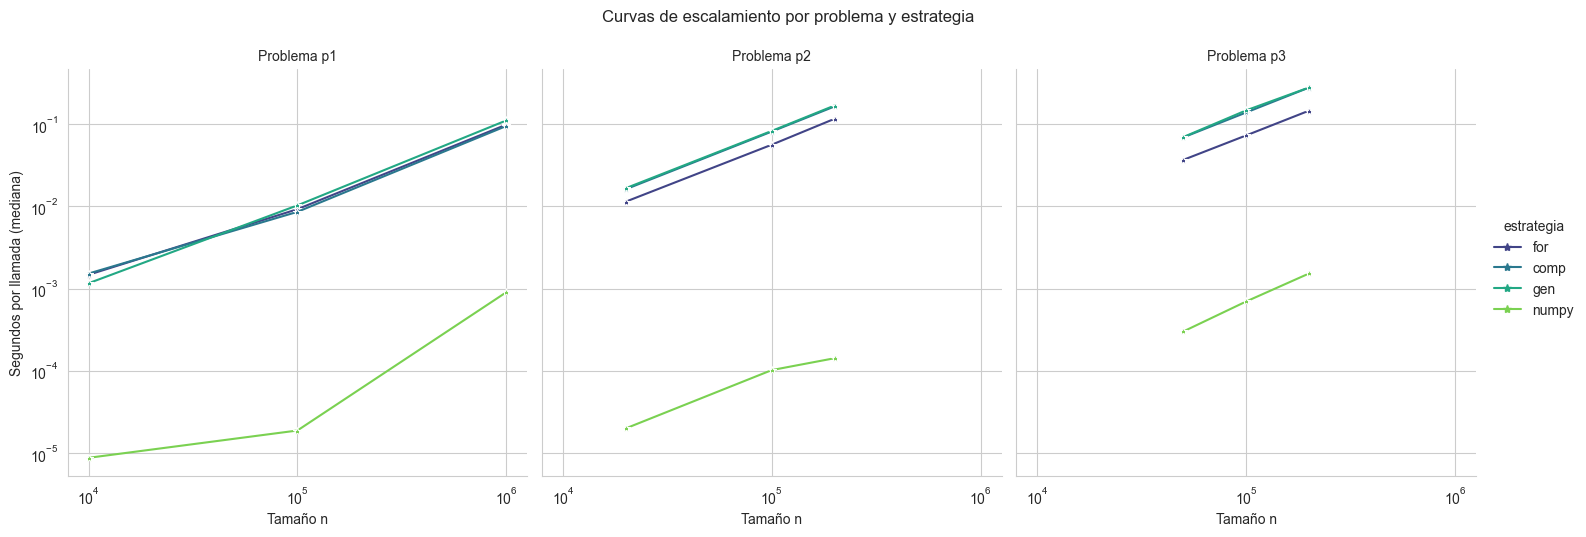

In [142]:
#GRAFICA 3: CURVA DE ESCALAMIENTO 
orden = ["for", "comp", "gen", "numpy"]
palette = sns.color_palette("viridis", n_colors=4)

g = sns.relplot(
    data=df_curve,
    x="n", y="s_por_llamada",
    hue="estrategia", hue_order=orden,
    col="problema", col_wrap=3,
    kind="line", marker="*", palette=palette
)

g.set(xscale="log", yscale="log")  
g.set_axis_labels("Tamaño n", "Segundos por llamada (mediana)")
g.set_titles("Problema {col_name}")
g.fig.suptitle("Curvas de escalamiento por problema y estrategia", y=1.05)

plt.show()
#plt.savefig("resultados/escalamiento_p123.png", dpi=300, bbox_inches="tight")


**Interpretación tercera gráfica (curva de esclamiento)**:
- En todos los problemas, las estrategias for, comp y gen escalan de forma similar; el tiempo crece aproximadamente linealmente con el tamaño n.
    -  gen y list comprehension tienen desempeños similares, con el gen ligeramente mejor en algunos casos.
- NumPy mantiene tiempos mucho menores en todos los problemas y en todos los tamaños de n. 
- grandes y list comprehension o gen solo para casos pequeños o educativos.

Text(0.5, 1.03, 'Razón de tiempos respecto a NumPy por problema y tamaño n')

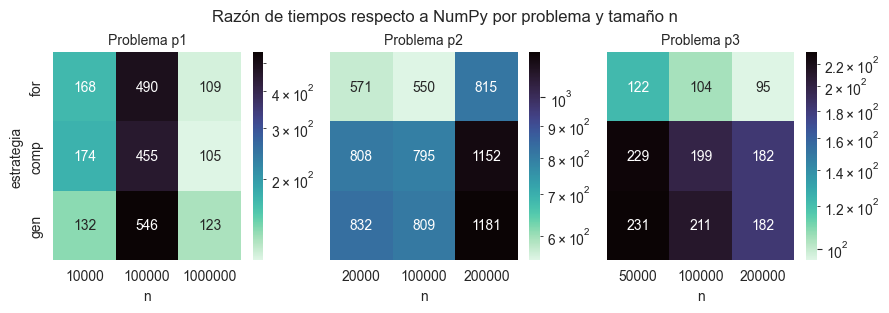

In [156]:
from matplotlib.colors import LogNorm  

df_ratio = df_curve.copy()
base = (df_curve[df_curve["estrategia"] == "numpy"]
        .rename(columns={"s_por_llamada": "s_numpy"})[["problema", "n", "s_numpy"]])
df_ratio = df_ratio.merge(base, on=["problema", "n"])
df_ratio["razon_vs_numpy"] = df_ratio["s_por_llamada"] / df_ratio["s_numpy"]
df_ratio = df_ratio[df_ratio["estrategia"] != "numpy"] 

orden_estr = ["for", "comp", "gen"]


def draw_heatmap(data, **kws):
    mat = (data.pivot_table(index="estrategia", columns="n", values="razon_vs_numpy")
                 .reindex(index=orden_estr))
    mat = mat[sorted(mat.columns)]  
    sns.heatmap(
        mat, cmap="mako_r",
        norm=LogNorm(),
        annot=True, fmt=".0f"
    )

g = sns.FacetGrid(df_ratio, col="problema", col_wrap=3, sharex=False, sharey=True)
g.map_dataframe(draw_heatmap)
g.set_titles("Problema {col_name}")
g.fig.suptitle("Razón de tiempos respecto a NumPy por problema y tamaño n", y=1.03)


**Interpretación cuarta gráfica (heatmap)**:
- En los tres problemas, NumPy es la estrategia más rápida, ya que todas las demás muestran razones muy superiores a 1, entre ~100× y más de 1000× más lentas.
- Las estrategias for, list comprehension y generator tienen rendimientos similares entre sí, aunque el generator suele ser ligeramente más lento, especialmente en p2, donde alcanza razones cercanas a 1200×.
- Además la razón crece con el tamaño n en la mayoría de los casos. 



